In [1]:
pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras import layers

In [68]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, MaxPool1D, Concatenate, Activation, Add, GlobalAveragePooling1D, \
    Dense, LSTM, TimeDistributed, Reshape, BatchNormalization, Bidirectional, Flatten, MaxPooling1D, Dropout, \
    SeparableConv1D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy, Reduction
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, BatchNormalization, Activation, Add, Concatenate,
                                     GlobalAveragePooling1D, Dense, Dropout, LayerNormalization, MultiHeadAttention)
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [3]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("WISDM.csv", index_col=0)
df

,user-id,activity,timestamp,X,Y,Z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user-id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   X          1098203 non-null  float64
 4   Y          1098203 non-null  float64
 5   Z          1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


In [25]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user-id,activity,timestamp,X,Y,Z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098199,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098200,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098201,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098202,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

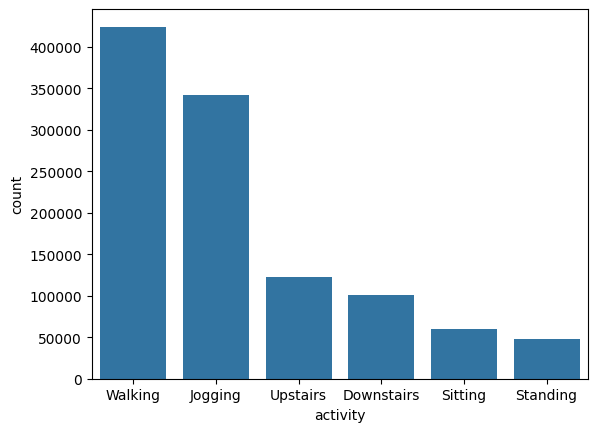

In [26]:
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)

In [27]:
df= df.drop('activity',axis=1)
df

,user-id,timestamp,X,Y,Z,ActivityEncoded
0,33,49105962326000,-0.694638,12.680544,0.503953,1
1,33,49106062271000,5.012288,11.264028,0.953424,1
2,33,49106112167000,4.903325,10.882658,-0.081722,1
3,33,49106222305000,-0.612916,18.496431,3.023717,1
4,33,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...
1098199,19,131623331483000,9.000000,-1.570000,1.690000,4
1098200,19,131623371431000,9.040000,-1.460000,1.730000,4
1098201,19,131623411592000,9.080000,-1.380000,1.690000,4
1098202,19,131623491487000,9.000000,-1.460000,1.730000,4


In [28]:
df_test = df[df['user-id'] > 27]
df_train = df[df['user-id'] <= 27]

In [29]:
import numpy as np

def segments(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X'].values[i:i+time_steps]
        ys = df['Y'].values[i:i+time_steps]
        zs = df['Z'].values[i:i+time_steps]
        
        # Finding the most frequent label within the segment
        segment_labels = df[label_name][i:i+time_steps].values
        label = np.bincount(segment_labels).argmax()
        
        segments.append([xs, ys, zs])
        labels.append(label)
    
    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)
    
    return reshaped_segments, labels

In [31]:
TIME_PERIOD = 80
STEP_DISTANCE = 40
LABEL = 'ActivityEncoded'
X_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)
X_test, y_test = segments(df_test, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((20334, 80, 3), (20334,), (7118, 80, 3), (7118,))

In [34]:
y_train

array([0, 0, 0, ..., 4, 4, 4])

In [52]:
'''
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)

print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\n\nenc = OneHotEncoder(handle_unknown = "ignore", sparse = False)\nenc = enc.fit(y_train)\n\ny_train_hot = enc.transform(y_train)\ny_test_hot = enc.transform(y_test)\n\nprint(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)\n'

In [43]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [35]:
n_classes = 6

In [45]:
# CNN Model
def cnn(x_shape,
        n_classes,
        filters,
        fc_hidden_nodes,
        learning_rate=0.01, regularization_rate=0.01,
        metrics=None):
    if metrics is None:
        metrics = ['accuracy']
    dim_length = x_shape[1]  # number of samples in a time series
    dim_channels = x_shape[2]  # number of channels
    dim_output = n_classes
    weightinit = 'lecun_uniform'  # weight initialization
    m = Sequential()

    m.add(BatchNormalization(input_shape=(dim_length, dim_channels)))
    for filter_number in filters:
        m.add(Conv1D(filter_number, kernel_size=3, padding='same',
                     kernel_regularizer=l2(regularization_rate),
                     kernel_initializer=weightinit))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(Flatten())
    m.add(Dense(units=fc_hidden_nodes,
                kernel_regularizer=l2(regularization_rate),
                kernel_initializer=weightinit))  # Fully connected layer
    m.add(Activation('relu'))  # Relu activation
    m.add(Dense(units=dim_output, kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate)))
    m.add(BatchNormalization())
    m.add(Activation(out_activ))  # Final classification layer

    m.compile(loss=out_loss,
              optimizer=Adam(lr=learning_rate),
              metrics=metrics)

    return m


# CNN-LSTM Model
def cnn_lstm(x_shape,
             n_classes,
             n_hidden=128,
             learning_rate=0.01,
             n_steps=4,
             length=32,
             n_signals=9,
             regularization_rate=0.01,
             cnn_depth=3,
             lstm_depth=2,
             metrics=['accuracy']):
    """ CNN1D_LSTM version 1: Divide 1 window into several smaller frames, then apply CNN to each frame
    - Input data format: [None, n_frames, n_timesteps, n_signals]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(Reshape((n_steps, length, n_signals), input_shape=_input_shape))
    m.add(BatchNormalization())
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    m.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu')))
    m.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu')))
    m.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    m.add(TimeDistributed(Flatten()))
    for _ in range(lstm_depth-1):
        m.add(LSTM(n_hidden, return_sequences=True,
                   kernel_regularizer=l2(regularization_rate)))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.5))
    m.add(Dense(100, activation='relu',
                kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    return m


# Vanilla LSTM Model
def vanilla_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 metrics=['accuracy']):
    """ Requires 3D data: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(LSTM(n_hidden))
    m.add(Dropout(0.3))
    m.add(Dense(100, activation='relu'))
    m.add(Dense(n_classes, activation=out_activ, kernel_regularizer=l2(regularization_rate)))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate),
              metrics=metrics)
    return m


# Stacked LSTM Model
def stacked_lstm(x_shape,
                 n_classes,
                 n_hidden=128,
                 learning_rate=0.01,
                 regularization_rate=0.01,
                 depth=2,
                 metrics=['accuracy']):
    """ Require 3D data: [n_samples, n_timesteps, n_signals]"""
    _input_shape = x_shape[1:]
    dim_length = x_shape[1]  # number of samples in a time series
    dim_channels = x_shape[2]  # number of channels
    dim_output = n_classes
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Dense(100, activation='relu', name='preprocess', kernel_regularizer=l2(regularization_rate)))
    m.add(LSTM(n_hidden, return_sequences=True, kernel_regularizer=l2(regularization_rate)))
    m.add(Dropout(0.5))
    m.add(LSTM(n_hidden))
    m.add(Dense(100, activation='relu'))
    m.add(Dense(dim_output, activation=out_activ, name="output"))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)
    return m


# BiLSTM Model
def bilstm(x_shape,
           n_classes,
           n_hidden=128,
           learning_rate=0.01,
           regularization_rate=0.01,
           merge_mode='concat',
           depth=2,
           metrics=['accuracy']):
    """ Requires 3D data: [n_samples, n_timesteps, n_features]"""

    _input_shape = x_shape[1:]
    m = Sequential()

    m.add(BatchNormalization(input_shape=_input_shape))
    m.add(Bidirectional(LSTM(n_hidden), merge_mode=merge_mode))
    m.add(Dense(100, activation='relu', kernel_regularizer=l2(regularization_rate)))
    m.add(Dense(n_classes, activation=out_activ))

    m.compile(loss=out_loss,
              optimizer=Adam(learning_rate=learning_rate, amsgrad=True),
              metrics=metrics)

    return m

In [70]:
def ispl_inception(x_shape,
                   n_classes,
                   filters_number,
                   head_size,
                   num_heads,
                   ff_dim,
                   num_transformer_blocks,
                   mlp_units,
                   use_residual=True,
                   use_bottleneck=True,
                   network_depth=5,
                   max_kernel_size=20,
                   learning_rate=0.01,
                   bottleneck_size=32,
                   regularization_rate=0.01,
                   metrics=['accuracy'],
                   dropout=0,
                   mlp_dropout=0,
                   out_activ='softmax',
                   out_loss='categorical_crossentropy'):
    dim_length = x_shape[1]  # 시계열의 샘플 수
    dim_channels = x_shape[2]  # 채널 수
    weightinit = 'lecun_uniform'  # 가중치 초기화

    def inception_module(input_tensor, stride=1, activation='relu'):
        if use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=bottleneck_size,
                                     kernel_size=1,
                                     padding='same',
                                     activation=activation,
                                     kernel_initializer=weightinit,
                                     use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_sizes = [max_kernel_size // (2 ** i) for i in range(3)]
        conv_list = []

        for kernel_size in kernel_sizes:
            conv_list.append(Conv1D(filters=filters_number,
                                    kernel_size=kernel_size,
                                    strides=stride,
                                    padding='same',
                                    activation=activation,
                                    kernel_initializer=weightinit,
                                    kernel_regularizer=l2(regularization_rate),
                                    use_bias=False)(input_inception))

        max_pool_1 = MaxPooling1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_last = Conv1D(filters=filters_number,
                           kernel_size=1,
                           padding='same',
                           activation=activation,
                           kernel_initializer=weightinit,
                           kernel_regularizer=l2(regularization_rate),
                           use_bias=False)(max_pool_1)

        conv_list.append(conv_last)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def shortcut_layer(input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]),
                            kernel_size=1,
                            padding='same',
                            kernel_initializer=weightinit,
                            kernel_regularizer=l2(regularization_rate),
                            use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x
    
    def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
        # Attention and Normalization
        x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        res = x + inputs

        # Feed Forward Part
        x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
        x = Dropout(dropout)(x)
        x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        return x + res

    # 실제 모델 생성
    input_layer = Input((dim_length, dim_channels))
    x = BatchNormalization()(input_layer)
    input_res = x

    for depth in range(network_depth):
        x = inception_module(x)
        if use_residual and depth % 3 == 2:
            x = shortcut_layer(input_res, x)
            input_res = x
    
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
        
    x = GlobalAveragePooling1D()(x)
        
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)

    # 최종 분류 레이어
    output_layer = Dense(n_classes, activation=out_activ,
                         kernel_initializer=weightinit, kernel_regularizer=l2(regularization_rate))(x)

    # 모델 생성 및 컴파일
    m = Model(inputs=input_layer, outputs=output_layer)
    m.compile(loss=out_loss, optimizer=Adam(learning_rate=learning_rate, amsgrad=True), metrics=metrics)

    return m

In [71]:
use_residual = True
use_bottleneck = True
learning_rate = 0.0005
regularization_rate = 0.00593,
network_depth = 5
filters_number = 64
max_kernel_size = 68,
use_residual = 'use_residual', 
use_bottleneck = 'use_bottleneck'
out_loss = CategoricalCrossentropy(reduction=Reduction.AUTO, name='output_loss')
out_activ = 'softmax'

In [72]:
head_size=256,
num_heads=4,
ff_dim=4,
num_transformer_blocks=4,
mlp_units=[128],
mlp_dropout=0.4,
dropout=0.25

In [73]:
model = ispl_inception(X_train.shape, n_classes, filters_number,
                       head_size=256,
                       num_heads=4,
                       ff_dim=4,
                       num_transformer_blocks=4,
                       mlp_units=[128],
                       network_depth=5,
                       use_residual=True,
                       use_bottleneck=True,
                       max_kernel_size=20,
                       learning_rate=0.01,
                       bottleneck_size=32,
                       regularization_rate=0.01,
                       metrics=['accuracy'])

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 80, 3)]              0         []                            
                                                                                                  
 batch_normalization_28 (Ba  (None, 80, 3)                12        ['input_5[0][0]']             
 tchNormalization)                                                                                
                                                                                                  
 conv1d_114 (Conv1D)         (None, 80, 32)               96        ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                              

                                                                                                  
 activation_26 (Activation)  (None, 80, 256)              0         ['batch_normalization_31[0][0]
                                                                    ']                            
                                                                                                  
 add_4 (Add)                 (None, 80, 256)              0         ['batch_normalization_32[0][0]
                                                                    ',                            
                                                                     'activation_26[0][0]']       
                                                                                                  
 activation_27 (Activation)  (None, 80, 256)              0         ['add_4[0][0]']               
                                                                                                  
 conv1d_13

                                                                     'tf.__operators__.add_10[0][0
                                                                    ]']                           
                                                                                                  
 multi_head_attention_7 (Mu  (None, 80, 256)              1051904   ['tf.__operators__.add_11[0][0
 ltiHeadAttention)                                                  ]',                           
                                                                     'tf.__operators__.add_11[0][0
                                                                    ]']                           
                                                                                                  
 dropout_13 (Dropout)        (None, 80, 256)              0         ['multi_head_attention_7[0][0]
                                                                    ']                            
          

                                                                                                  
 dropout_18 (Dropout)        (None, 80, 4)                0         ['conv1d_146[0][0]']          
                                                                                                  
 conv1d_147 (Conv1D)         (None, 80, 256)              1280      ['dropout_18[0][0]']          
                                                                                                  
 layer_normalization_17 (La  (None, 80, 256)              512       ['conv1d_147[0][0]']          
 yerNormalization)                                                                                
                                                                                                  
 tf.__operators__.add_17 (T  (None, 80, 256)              0         ['layer_normalization_17[0][0]
 FOpLambda)                                                         ',                            
          

In [75]:
epochs = 10
num_classes = 6

In [76]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train, num_classes)
print("y_train shape: ", y_train_hot.shape)

y_train shape:  (20334, 6)


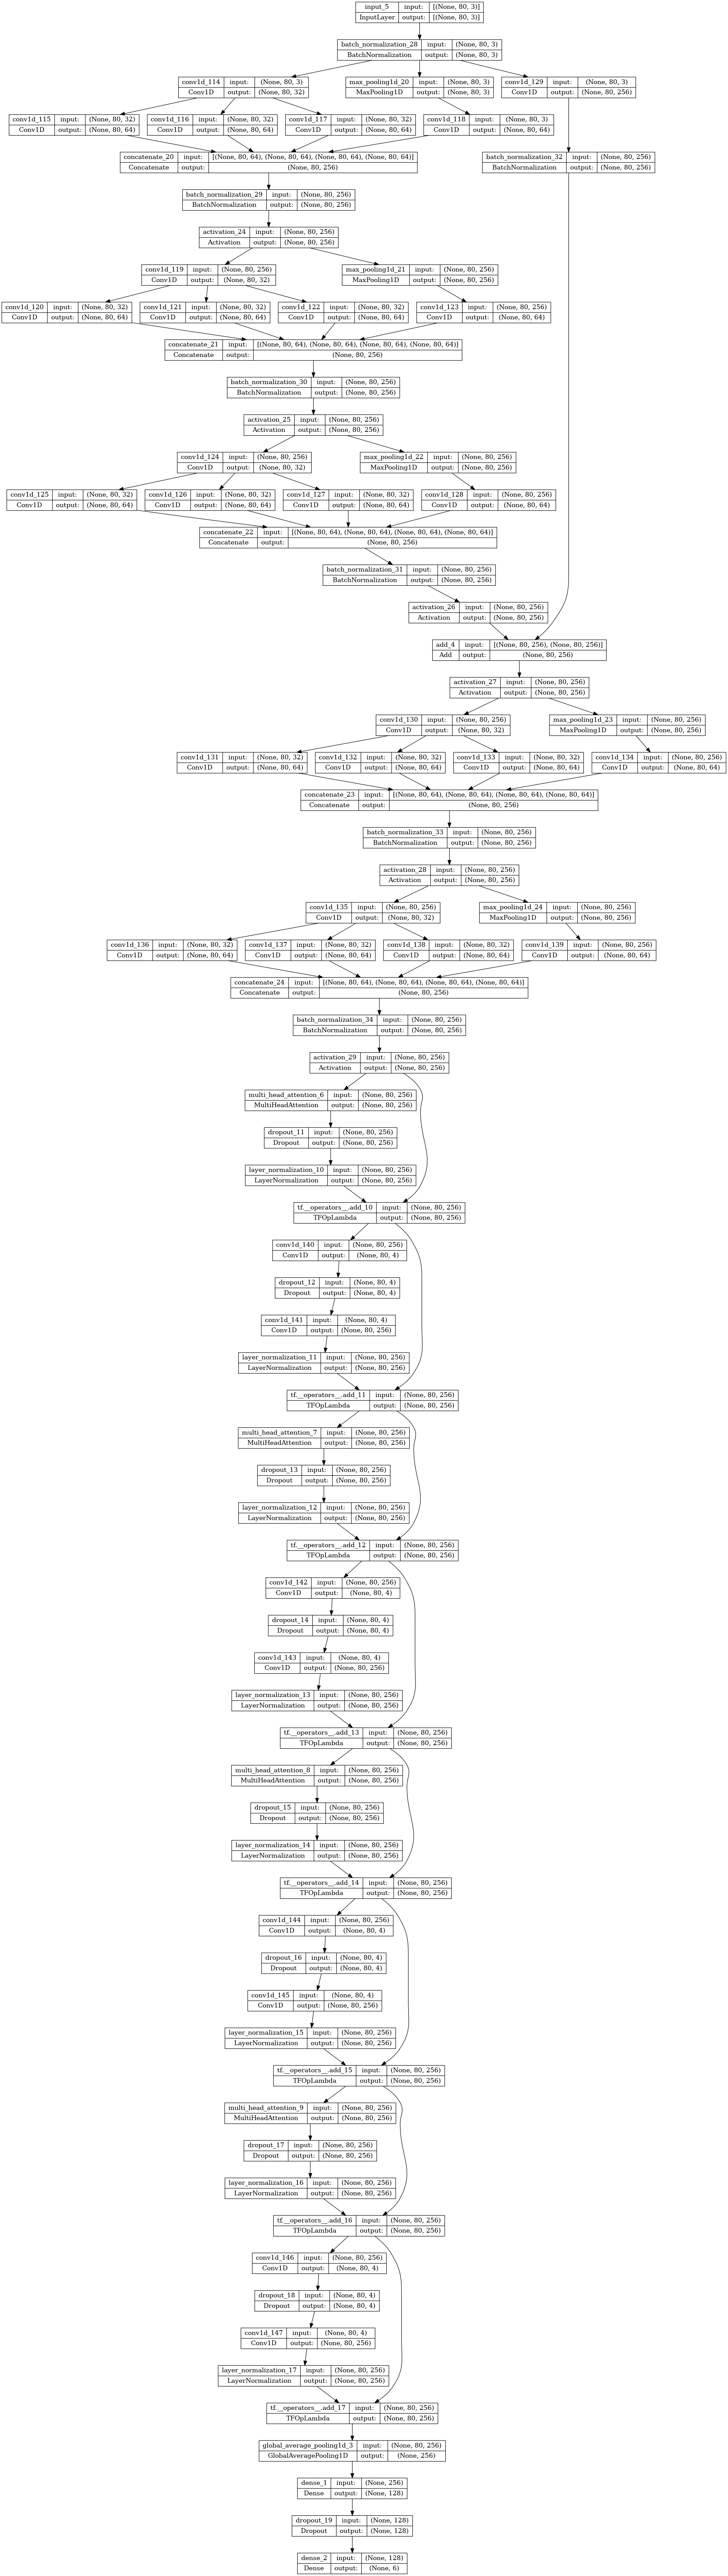

In [77]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [78]:
validation_split = 0.1
history = model.fit(X_train, y_train_hot, batch_size= 192, epochs=10, verbose=True,  validation_split=validation_split)

Epoch 1/10


2024-07-31 18:00:50.567581: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-31 18:00:51.253376: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f50503813f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-31 18:00:51.253414: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-31 18:00:51.253421: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-07-31 18:00:51.261928: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-31 18:00:51.352893: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/96 [==============================] - 22s 64ms/step - loss: 10.3640 - accuracy: 0.7377 - val_loss: 8.2412 - val_accuracy: 0.0964
Epoch 2/10
96/96 [==============================] - 5s 49ms/step - loss: 2.4083 - accuracy: 0.8483 - val_loss: 4.8134 - val_accuracy: 0.0585
Epoch 3/10
96/96 [==============================] - 5s 49ms/step - loss: 1.6871 - accuracy: 0.8641 - val_loss: 6.1801 - val_accuracy: 0.0964
Epoch 4/10
96/96 [==============================] - 5s 48ms/step - loss: 1.6834 - accuracy: 0.8607 - val_loss: 4.2245 - val_accuracy: 0.0659
Epoch 5/10
96/96 [==============================] - 5s 48ms/step - loss: 1.3001 - accuracy: 0.8680 - val_loss: 3.7291 - val_accuracy: 0.0590
Epoch 6/10
96/96 [==============================] - 5s 48ms/step - loss: 2.4085 - accuracy: 0.8377 - val_loss: 4.5503 - val_accuracy: 0.4292
Epoch 7/10
96/96 [==============================] - 5s 50ms/step - loss: 2.0055 - accuracy: 0.8376 - val_loss: 5.1317 - val_accuracy: 0.2812
Epoch 8/10
96/96 [====

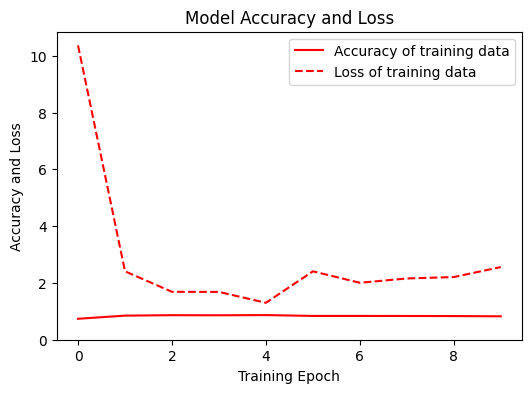

223/223 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2751
           1       0.97      0.26      0.41      1989
           2       0.16      0.62      0.26       799
           3       0.00      0.00      0.00       723
           4       0.00      0.00      0.00       453
           5       0.00      0.00      0.00       403

    accuracy                           0.52      7118
   macro avg       0.32      0.31      0.25      7118
weighted avg       0.58      0.52      0.47      7118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

y_pred_test = model.predict(X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
print(classification_report(y_test, max_y_pred_test))